<a href="https://colab.research.google.com/github/lauraceciliadiazdavila/IA-LIDeSIA-Dpto-Computacion/blob/main/07_Kmeans/Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

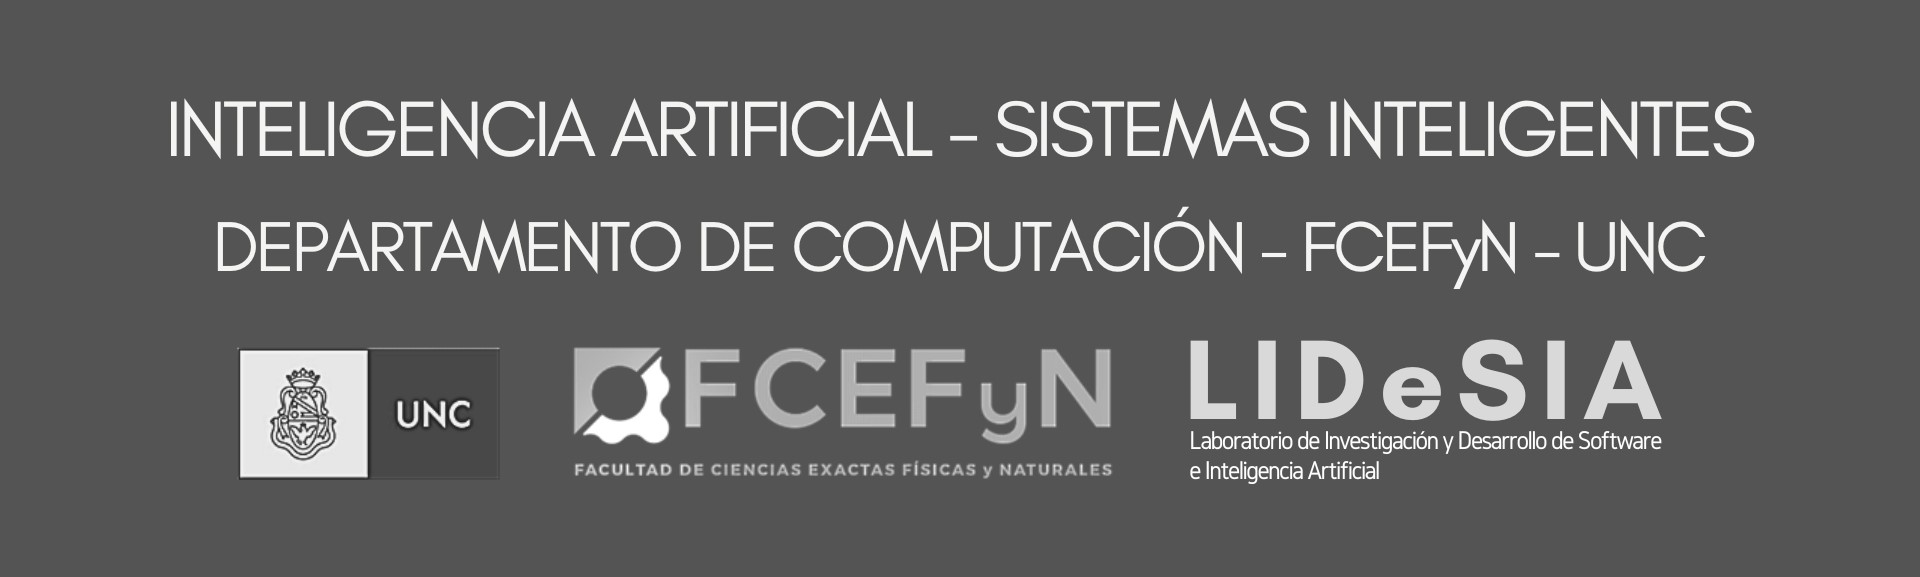

---

FCEFyN - UNC - Cátedra de Inteligencia Artificial


---

*   Autor/es: Ing. Sandro Mauricio Comerci (LIDeSIA - FCEFyN)

*   Directora: Dra. Laura Cecilia Diaz Davila (LIDeSIA - FCEFyN)

* Actualizada por: Miguel Ortiz

---



# <h1 align="center"> 𝕋𝕖𝕠𝕣𝕚𝕒 <h1>

<h2> K-Means </h2>

Es un algoritmo de Custering del tipo no supervisado. El objetivo de este algoritmo es encontrar “K” grupos (clusters) dentro de nuestros datos.

El algoritmo trabaja iterativamente para incluir a cada ejemplo de nuestra base de datos dentro de uno de los “K” grupos basado en la similitud de sus atributos.

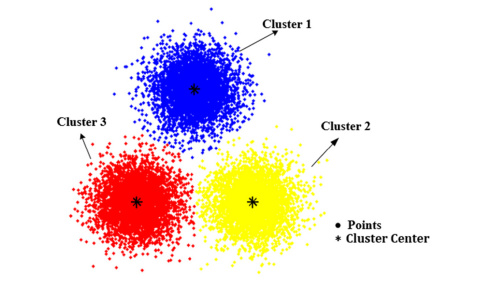

<h2> OpenCV </h2>

Es una librería para visión artificial de código abierto y que está disponible para muchos lenguajes de programación.

>[Documentacion](https://docs.opencv.org/4.x/)

<h2> Pandas </h2>

Es una libreria que depende de de Numpy, esta librería añade un potente manejo matricial a Python. Los principales tipos de datos que pueden representarse con pandas son:
- Datos tabulares con columnas de tipo heterogéneo con etiquetas en columnas y filas.
-Series temporales.

Pandas proporciona herramientas que permiten:
- Leer y escribir datos en diferentes formatos: CSV, Microsoft Excel, bases SQL y formato HDF5
- Seleccionar y filtrar de manera sencilla tablas de datos en función de posición, valor o etiquetas
- Fusionar y unir datos
transformar datos aplicando funciones tanto en global como por ventanas
- Manipulación de series temporales
- Realizar gráficas

> [Documentacion](https://pandas.pydata.org/)

# <h1 align="center"> ℙ𝕣𝕒𝕔𝕥𝕚𝕔𝕒 <h1>

## Librerias

In [ ]:
from google.colab.patches import cv2_imshow
from google.colab import drive
import cv2
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import ipywidgets as widgets

## Implementacion

In [ ]:
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


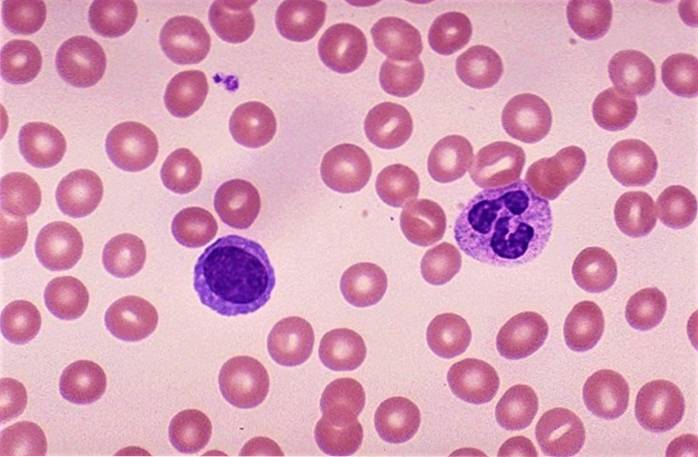

(457, 698, 3)

In [ ]:
image = cv2.imread('/content/drive/Shareddrives/Cátedra de Inteligencia Artificial/Google Colabs/7. Kmeans/sangre.png')
cv2_imshow(image)
image.shape

Una imagen digital es una representación bidimensional de una imagen a partir de una matriz numérica

Las imágenes digitales están conformadas por píxeles (elementos de la matriz), y los píxeles están formados por las combinaciones de colores primarios (imágenes RGB).

Podemos pensar a un canal en este contexto, como una copia de la imagen del mismo tamaño que la imágen original, donde el valor de cada uno de sus pixels define la intensidad del color.

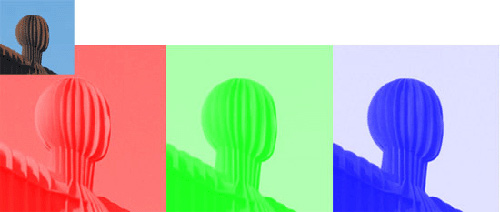

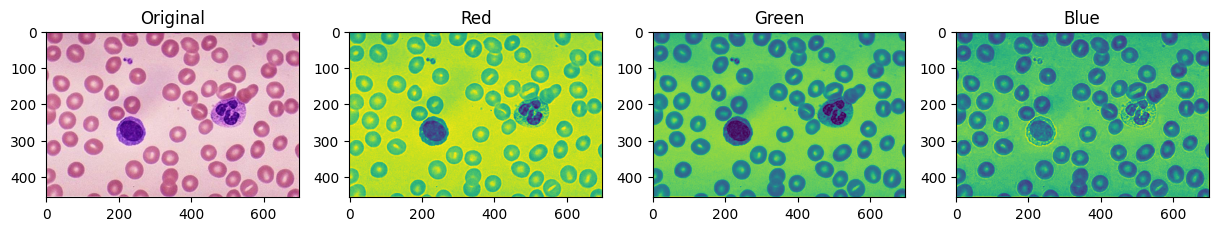

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(15, 15))
image_plt = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #opencv BGR
channel_red = image[:,:,2]
channel_green = image[:,:,1]
channel_blue = image[:,:,0]
axs[0].imshow(image_plt)
axs[3].imshow(channel_blue)
axs[2].imshow(channel_green)
axs[1].imshow(channel_red)
axs[0].title.set_text('Original')
axs[3].title.set_text('Blue')
axs[2].title.set_text('Green')
axs[1].title.set_text('Red')
plt.show()

### Creando la base de datos

In [ ]:
dimensiones = image.shape #(405, 720, 3)
pixels = dimensiones[0]*dimensiones[1]
pixels

318986

In [ ]:
pixels= np.zeros([pixels,3], dtype='int')
pixels

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       ...,
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])

In [ ]:
for fila in range(dimensiones[0]):
  for columna in range(dimensiones[1]):
    pixels[fila*dimensiones[1]+columna,0:3]=image[fila,columna,:]
pixels

array([[205, 184, 233],
       [201, 175, 228],
       [195, 163, 218],
       ...,
       [163, 122, 214],
       [159, 115, 210],
       [159, 114, 211]])

In [ ]:
pixels_df = pd.DataFrame(pixels, columns=['blue', 'green', 'red'])
pixels_df

,blue,green,red
0,205,184,233
1,201,175,228
2,195,163,218
3,186,145,206
4,177,125,195
...,...,...,...
318981,191,152,237
318982,176,136,224
318983,163,122,214
318984,159,115,210


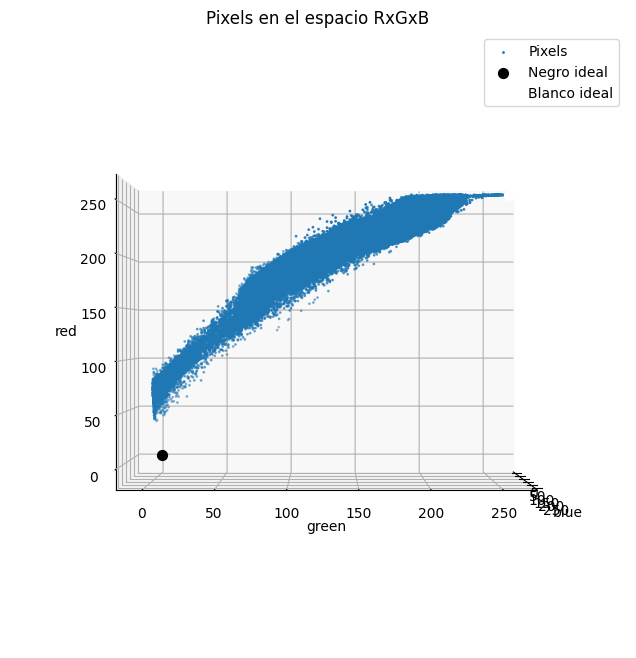

In [ ]:
# Modificación del tamaño de la imagen
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

atributos = ['blue', 'green', 'red']
x1 = pixels_df[atributos[0]].values
x2 = pixels_df[atributos[1]].values
x3 = pixels_df[atributos[2]].values

ax.scatter(x1, x2, x3, s=1, label='Pixels')
ax.scatter(0, 0, 0, c='black', s=50, label='Negro ideal')
ax.scatter(255, 255, 255, c='white', s=50, label='Blanco ideal')

ax.set_xlabel(atributos[0])
ax.set_ylabel(atributos[1])
ax.set_zlabel(atributos[2])
ax.set_title('Pixels en el espacio RxGxB')
ax.legend()

ax.view_init(azim=0, elev=0)

plt.show()

Text(0.5, 1.0, 'Inertia of k-Means versus number of clusters')

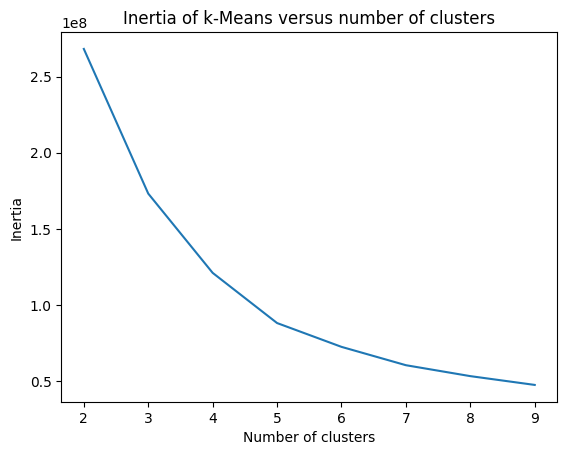

In [ ]:
scores = [KMeans(n_clusters=i+2, n_init=10).fit(pixels_df).inertia_ for i in range(8)]
plt.plot(np.arange(2, 10), scores)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of k-Means versus number of clusters")

In [ ]:
kmeans = KMeans(n_clusters=5, n_init=10)
kmeans.fit(pixels_df)
pixels_clusters = pixels_df.copy()
pixels_clusters['kmeans_group']=kmeans.labels_
pixels_clusters

,blue,green,red,kmeans_group
0,205,184,233,3
1,201,175,228,3
2,195,163,218,3
3,186,145,206,4
4,177,125,195,4
...,...,...,...,...
318981,191,152,237,3
318982,176,136,224,4
318983,163,122,214,4
318984,159,115,210,4


In [ ]:
#@title Visualizar los clusters
n_groups = np.unique(kmeans.labels_)
@widgets.interact(cluster=n_groups)
def visualizer(cluster):
  img = image
  img_original = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #opencv BGR

  target_cluster_index = cluster

  mask = (kmeans.labels_ == target_cluster_index)

  highlighted_image = np.zeros_like(img_original)

  highlighted_image[mask.reshape(457, 698)] = img_original[mask.reshape(457, 698)]

  a= patos.shape

  clasif_patos= kmeans.labels_.reshape(a[0],a[1])

  fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 15))

  axs[0].imshow(img_original)
  axs[1].imshow(clasif_patos)
  axs[2].imshow(highlighted_image)

  axs[0].title.set_text('Original')
  axs[1].title.set_text('Clusters')
  axs[2].title.set_text(f"Cluster {target_cluster_index}")

  plt.show()

interactive(children=(Dropdown(description='cluster', options=(0, 1, 2, 3, 4), value=0), Output()), _dom_class…